In [2]:
import geopandas
from geopandas import GeoSeries
from shapely.geometry import Polygon
p1 = Polygon([(0, 0), (1, 0), (1, 1)])
p2 = Polygon([(0, 0), (1, 0), (1, 1), (0, 1)])
p3 = Polygon([(2, 0), (3, 0), (3, 1), (2, 1)])
g = GeoSeries([p1, p2, p3])
g


0    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
1    POLYGON ((0.00000 0.00000, 1.00000 0.00000, 1....
2    POLYGON ((2.00000 0.00000, 3.00000 0.00000, 3....
dtype: geometry

In [3]:
print(g.area)

0    0.5
1    1.0
2    1.0
dtype: float64


In [4]:
g.buffer(0.5)

0    POLYGON ((-0.35355 0.35355, 0.64645 1.35355, 0...
1    POLYGON ((-0.50000 0.00000, -0.50000 1.00000, ...
2    POLYGON ((1.50000 0.00000, 1.50000 1.00000, 1....
dtype: geometry

<AxesSubplot:>

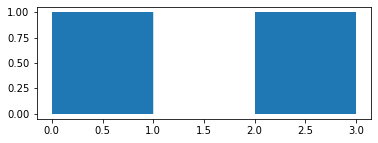

In [5]:
g.plot()

In [6]:
nybb_path = geopandas.datasets.get_path('nybb')
boros = geopandas.read_file(nybb_path)
boros.set_index('BoroCode', inplace=True)
boros.sort_index(inplace=True)
boros

,BoroName,Shape_Leng,Shape_Area,geometry
BoroCode,,,,
1,Manhattan,359299.096471,6.364715e+08,"MULTIPOLYGON (((981219.056 188655.316, 980940...."
2,Bronx,464392.991824,1.186925e+09,"MULTIPOLYGON (((1012821.806 229228.265, 101278..."
3,Brooklyn,741080.523166,1.937479e+09,"MULTIPOLYGON (((1021176.479 151374.797, 102100..."
4,Queens,896344.047763,3.045213e+09,"MULTIPOLYGON (((1029606.077 156073.814, 102957..."
5,Staten Island,330470.010332,1.623820e+09,"MULTIPOLYGON (((970217.022 145643.332, 970227...."


In [10]:
boros['geometry'].convex_hull


BoroCode
1    POLYGON ((977855.445 188082.322, 971830.134 19...
2    POLYGON ((1017949.978 225426.885, 1015563.562 ...
3    POLYGON ((988872.821 146772.032, 983670.606 14...
4    POLYGON ((1000721.532 136681.776, 994611.996 2...
5    POLYGON ((915517.688 120121.881, 915467.035 12...
dtype: geometry

In [11]:
import numpy as np
from shapely.geometry import Point
xmin, xmax, ymin, ymax = 900000, 1080000, 120000, 280000
xc = (xmax - xmin) * np.random.random(2000) + xmin
yc = (ymax - ymin) * np.random.random(2000) + ymin
pts = GeoSeries([Point(x, y) for x, y in zip(xc, yc)])

In [12]:
circles = pts.buffer(2000)

In [13]:
mp = circles.unary_union


In [14]:
holes = boros['geometry'].intersection(mp)


In [15]:
boros_with_holes = boros['geometry'].difference(mp)

In [16]:
holes.area / boros.geometry.area

BoroCode
1    0.581772
2    0.582247
3    0.585492
4    0.580764
5    0.566713
dtype: float64

<AxesSubplot:>

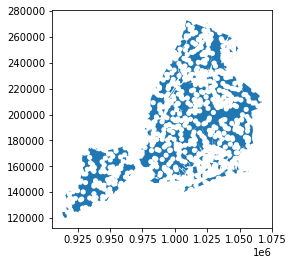

In [17]:
boros_with_holes.plot()